# NYCyclepedia

Dataset: 
- **NYC citibike (sample)**  `citibike_manhattan_sample.csv`
- **NYC crashes (sample)** `crash_manhattan.csv`

Source: 
- https://s3.amazonaws.com/tripdata/index.html
- https://data.cityofnewyork.us/resource/h9gi-nx95.csv 


Note: Find more datasets on [NYC open data](https://opendata.cityofnewyork.us/)


This starter notebook helps you load, inspect, and draw basic visualiztion of the citibike data and the crash data. You can download the processed file used in this notebook here: [citibike](https://ucdavis.box.com/s/7bsm2ooih0e1lobf0bzu82g21ytjxdqy) and [crash](https://ucdavis.box.com/s/sxfx50or7p7mag5nnasctj3ilnuyjqrn).

- You need to install `geopandas` and `contextily` libraries. Please follow the instructions we discussed: [link](https://anaconda.org/conda-forge/contextily) for anaconda.

## 1 Data loading and preprocessing

In this starter notebook, we will investigate two small subsets of the actual data. 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# File locations (relative to notebook)
PATH_TRIPS  = '../data/citibike_manhattan_sample.csv'
PATH_CRASH  = '../data/crash_manhattan.csv'

## 2 Citi bike trips

In [2]:
trips = pd.read_csv(PATH_TRIPS, parse_dates=['started_at']) # `started_at` -> datetime

In [3]:
trips.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
0,909D5395BDB84C5A,classic_bike,2025-05-07 08:37:25.150,2025-05-07 08:52:54.948,40.715119,-73.984171,40.737006,-73.990134
1,ABAEE160142525C7,classic_bike,2025-05-08 12:13:01.827,2025-05-08 12:16:33.530,40.769943,-73.960607,40.775744,-73.956375
2,B042E43F03662BB9,electric_bike,2025-05-03 13:08:14.076,2025-05-03 13:36:15.550,40.767549,-73.920933,40.766368,-73.971518
3,B7A1159AFEB486B0,electric_bike,2025-05-11 11:06:49.086,2025-05-11 11:30:12.718,40.702772,-73.993836,40.722104,-73.997249
4,AA9FAA0A72E8B29F,electric_bike,2025-05-10 15:11:46.679,2025-05-10 15:33:16.633,40.719876,-73.963865,40.720280,-73.998790


In [4]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39953 entries, 0 to 39952
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ride_id        39953 non-null  object        
 1   rideable_type  39953 non-null  object        
 2   started_at     39953 non-null  datetime64[ns]
 3   ended_at       39953 non-null  object        
 4   start_lat      39938 non-null  float64       
 5   start_lng      39938 non-null  float64       
 6   end_lat        39806 non-null  float64       
 7   end_lng        39806 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 2.4+ MB


In [5]:
trips.describe()

,started_at,start_lat,start_lng,end_lat,end_lng
count,39953,39938.000000,39938.000000,39806.000000,39806.000000
mean,2025-05-07 17:30:35.034899712,40.745006,-73.975122,40.744788,-73.975007
min,2025-04-30 06:40:26.938000,40.639660,-74.023240,40.633385,-74.022141
25%,2025-05-03 17:44:06.988999936,40.720664,-73.993929,40.720664,-73.994685
50%,2025-05-07 19:16:27.256999936,40.741724,-73.981317,40.742327,-73.981968
75%,2025-05-11 08:37:10.705999872,40.763189,-73.957145,40.762110,-73.956388
max,2025-05-14 19:59:46.408000,40.885240,-73.859590,40.886020,-73.854640
std,NaN,0.032794,0.024902,0.032801,0.025060


In [6]:
trips = trips[['started_at', 'start_lat', 'start_lng']].copy() # focusing on start point

N_SAMPLE = 5000

if N_SAMPLE and len(trips) > N_SAMPLE:
    trips = trips.sample(N_SAMPLE, random_state=0)

print(f'Trips loaded: {len(trips):,}')
trips.head()

Trips loaded: 5,000


,started_at,start_lat,start_lng
26170,2025-05-11 09:28:38.515,40.725770,-73.941730
6711,2025-05-01 16:46:49.659,40.780578,-73.985624
27765,2025-05-10 15:05:50.251,40.742752,-73.984716
13703,2025-05-12 07:58:04.042,40.734312,-73.983725
6770,2025-05-02 06:11:52.932,40.753880,-73.914952


In [7]:
# Convert to GeoDataFrames (EPSG 4326)
g_trips = gpd.GeoDataFrame(trips, geometry=gpd.points_from_xy(trips.start_lng, trips.start_lat), crs=4326)
g_trips.head()

,started_at,start_lat,start_lng,geometry
26170,2025-05-11 09:28:38.515,40.725770,-73.941730,POINT (-73.94173 40.72577)
6711,2025-05-01 16:46:49.659,40.780578,-73.985624,POINT (-73.98562 40.78058)
27765,2025-05-10 15:05:50.251,40.742752,-73.984716,POINT (-73.98472 40.74275)
13703,2025-05-12 07:58:04.042,40.734312,-73.983725,POINT (-73.98373 40.73431)
6770,2025-05-02 06:11:52.932,40.753880,-73.914952,POINT (-73.91495 40.75388)


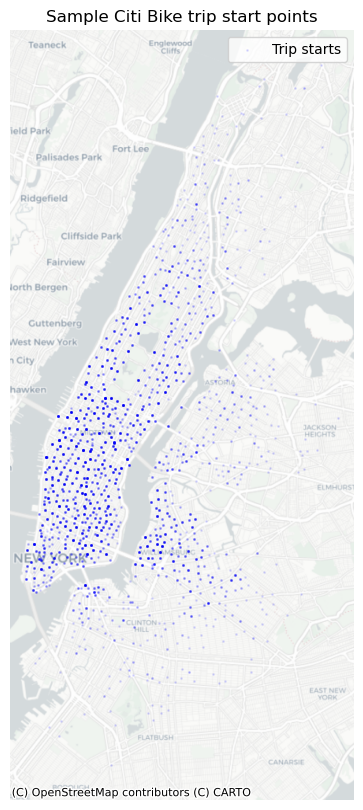

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

g_trips.plot(ax=ax, markersize=1, alpha=0.1, color='blue', label='Trip starts') # a more direct way to create a plot from GeoDataFrame.
ctx.add_basemap(ax=ax, crs=g_trips.crs, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()
ax.set_title('Sample Citi Bike trip start points')
ax.legend()

plt.show()

## 3  Crashes

In [9]:
crash_cols = ['crash_date', 'crash_time', 'latitude', 'longitude']
crash = pd.read_csv(PATH_CRASH, usecols=crash_cols, parse_dates=['crash_date'])
crash = crash.dropna(subset=['latitude','longitude'])

print(f'Crashes loaded: {len(crash):,}')
crash.head()

Crashes loaded: 95


,crash_date,crash_time,latitude,longitude
0,2021-12-14,14:58,40.751440,-73.973970
1,2021-12-11,4:45,40.748917,-73.993546
2,2022-04-24,15:35,40.767242,-73.986206
3,2022-04-07,14:14,40.748158,-73.970330
4,2021-12-08,16:20,40.776237,-73.943825


In [10]:
# Convert to GeoDataFrames (EPSG 4326)
g_crash = gpd.GeoDataFrame(crash, geometry=gpd.points_from_xy(crash.longitude, crash.latitude), crs=4326)

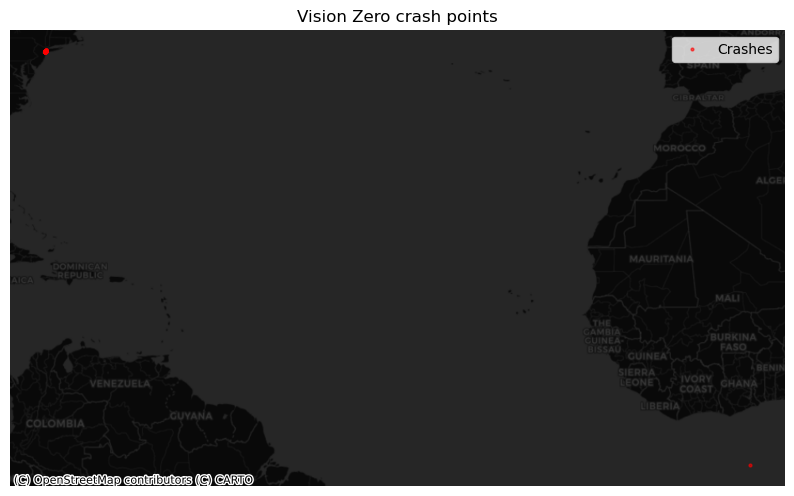

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

g_crash.plot(ax=ax, markersize=4, alpha=0.6, color='red', label='Crashes')
ctx.add_basemap(ax, crs=g_crash.crs, source=ctx.providers.CartoDB.DarkMatter)

ax.set_axis_off()
ax.set_title('Vision Zero crash points')
ax.legend()

plt.show()

There are obviously a few outliers. We can remove these outliers by checking whether they are within NYC.

In [12]:
# ── Remove spatial outliers ──────────────────────────────────────────
# Rough NYC envelope (covers all five boroughs + a bit of buffer)
NYC_BBOX = {
    "lat_min": 40.45,   # Staten Island south tip
    "lat_max": 40.95,   # Bronx north edge
    "lon_min": -74.30,  # Jersey side of the Hudson
    "lon_max": -73.60   # Eastern Queens/LI border
}

mask = (
    g_crash.latitude.between(NYC_BBOX["lat_min"], NYC_BBOX["lat_max"]) &
    g_crash.longitude.between(NYC_BBOX["lon_min"], NYC_BBOX["lon_max"])
)

n_before = len(g_crash)
g_crash = g_crash[mask].copy()
print(f"Outliers removed: {n_before - len(g_crash)} (kept {len(g_crash)} rows)")


Outliers removed: 1 (kept 94 rows)


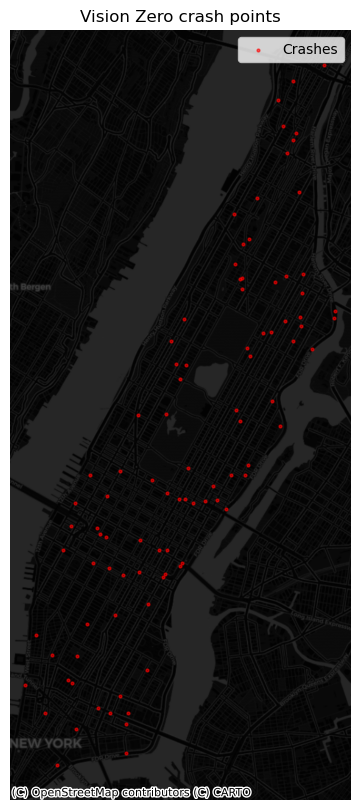

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

g_crash.plot(ax=ax, markersize=4, alpha=0.6, color='red', label='Crashes')
ctx.add_basemap(ax, crs=g_crash.crs, source=ctx.providers.CartoDB.DarkMatter)

ax.set_axis_off()
ax.set_title('Vision Zero crash points')
ax.legend()

plt.show()

## 4 Crash & Trip

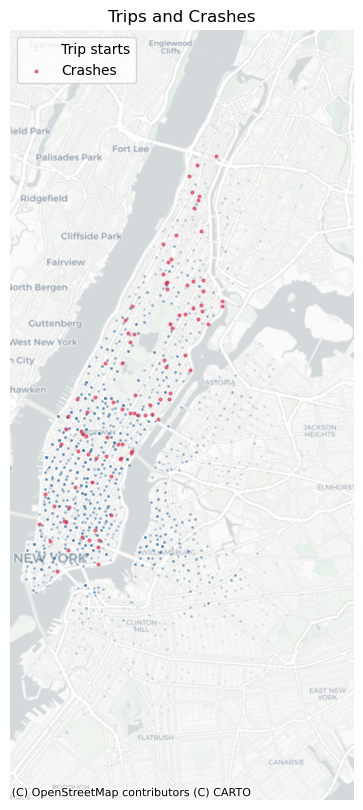

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

g_trips.plot(ax=ax, markersize=1, alpha=0.08, color='steelblue', label='Trip starts')
g_crash.plot(ax=ax, markersize=4, alpha=0.5, color='crimson', label='Crashes')
ctx.add_basemap(ax, crs=g_trips.crs, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()
ax.set_title('Trips and Crashes')
ax.legend()

plt.show()

## 5 Next step?